In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns

In [2]:
!pip install sklearn

In [3]:
df=pd.read_csv('airQuality.csv',parse_dates = ["Date"])

In [4]:
df

,Date,City,PM2.5,PM10,SO2,NO2,CO,NO,O3,NH3,AQI
0,2023-02-23 06:41:33,Dhaka,79.44,97.78,3.10,8.74,447.27,0.00,52.93,3.71,5
1,2023-02-23 06:41:33,Faridpur,91.44,110.78,7.51,9.00,540.73,0.00,49.35,4.37,5
2,2023-02-23 06:41:33,Gazipur,77.78,95.25,2.44,6.34,423.91,0.00,51.50,4.18,5
3,2023-02-23 06:41:33,Gopalganj,147.56,164.69,15.97,10.45,727.65,0.00,95.84,27.87,5
4,2023-02-23 06:41:33,Jamalpur,212.20,235.52,17.88,16.28,1054.76,0.00,73.67,23.31,5
...,...,...,...,...,...,...,...,...,...,...,...
2747,2023-03-26 12:19:35,Kushtia,78.65,88.65,5.31,2.40,680.92,0.24,147.34,8.87,5
2748,2023-03-26 12:19:36,Magura,93.43,104.00,10.25,3.43,747.68,0.24,185.97,5.07,5
2749,2023-03-26 12:19:36,Meherpur,76.38,87.52,8.82,2.91,674.25,0.25,155.93,9.25,5
2750,2023-03-26 12:19:37,Narail,70.32,77.76,12.99,3.00,620.84,0.22,170.23,3.67,4


In [5]:
df = df.dropna()

In [6]:
print(df)

                    Date       City   PM2.5    PM10    SO2    NO2       CO  \
0    2023-02-23 06:41:33      Dhaka   79.44   97.78   3.10   8.74   447.27   
1    2023-02-23 06:41:33   Faridpur   91.44  110.78   7.51   9.00   540.73   
2    2023-02-23 06:41:33    Gazipur   77.78   95.25   2.44   6.34   423.91   
3    2023-02-23 06:41:33  Gopalganj  147.56  164.69  15.97  10.45   727.65   
4    2023-02-23 06:41:33   Jamalpur  212.20  235.52  17.88  16.28  1054.76   
...                  ...        ...     ...     ...    ...    ...      ...   
2747 2023-03-26 12:19:35    Kushtia   78.65   88.65   5.31   2.40   680.92   
2748 2023-03-26 12:19:36     Magura   93.43  104.00  10.25   3.43   747.68   
2749 2023-03-26 12:19:36   Meherpur   76.38   87.52   8.82   2.91   674.25   
2750 2023-03-26 12:19:37     Narail   70.32   77.76  12.99   3.00   620.84   
2751 2023-03-26 12:19:37   Satkhira   22.01   29.93  17.17   3.90   400.54   

        NO      O3    NH3  AQI  
0     0.00   52.93   3.71    5

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2752 entries, 0 to 2751
Data columns (total 11 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Date    2752 non-null   datetime64[ns]
 1   City    2752 non-null   object        
 2   PM2.5   2752 non-null   float64       
 3   PM10    2752 non-null   float64       
 4   SO2     2752 non-null   float64       
 5   NO2     2752 non-null   float64       
 6   CO      2752 non-null   float64       
 7   NO      2752 non-null   float64       
 8   O3      2752 non-null   float64       
 9   NH3     2752 non-null   float64       
 10  AQI     2752 non-null   int64         
dtypes: datetime64[ns](1), float64(8), int64(1), object(1)
memory usage: 236.6+ KB


In [8]:
df.describe()

,PM2.5,PM10,SO2,NO2,CO,NO,O3,NH3,AQI
count,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000,2752.000000
mean,99.707180,117.867555,6.065839,11.473187,840.665923,0.850501,74.147961,18.283481,4.352471
std,58.825076,69.325121,6.570382,12.584866,489.002290,5.691894,57.034436,19.875440,1.131503
min,2.750000,3.310000,0.060000,0.170000,250.340000,0.000000,0.000000,0.000000,1.000000
25%,63.932500,74.487500,1.850000,3.510000,560.760000,0.000000,26.110000,5.000000,4.000000
50%,94.845000,113.345000,3.640000,8.140000,747.680000,0.050000,61.510000,12.290000,5.000000
75%,128.940000,153.800000,7.870000,15.420000,974.660000,0.240000,111.580000,25.330000,5.000000
max,629.840000,677.990000,65.800000,153.540000,8331.300000,141.260000,320.440000,188.470000,5.000000


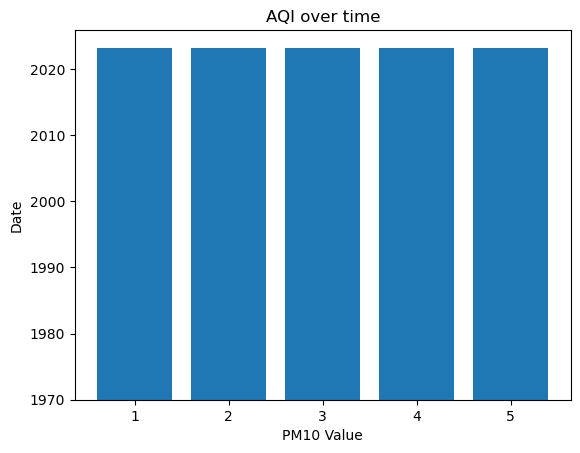

In [11]:
import matplotlib.pyplot as plt

# dates = [1, 2, 3, 4, 5]
# aqi = [100, 150, 130, 160, 200]

plt.bar(df.AQI, df.Date)
plt.title("AQI over time")
plt.xlabel("PM10 Value")
plt.ylabel("Date")
plt.show()


In [12]:
df.PM10

0        97.78
1       110.78
2        95.25
3       164.69
4       235.52
         ...  
2747     88.65
2748    104.00
2749     87.52
2750     77.76
2751     29.93
Name: PM10, Length: 2752, dtype: float64